## Forward / Backward Propagation

- forward propagation
  - 입력을 받아 최종 loss 값을 출력하는 단계
- Backward propagation
  - 레이어를 역으로 순회하면서 출력된 loss를 통해 각 파라미터의 gradient를 계산하는 단계
  - gradient를 계산한 뒤 gradient descent 방법으로 파라미터 업데이트


Example

결국 loss function을 줄이는 것이 목적!
- 즉, 파라미터가 어느 방향으로 움직였을 때 loss가 줄어드는지 찾고 해당 방향으로 파라미터를 변화하는게 목적
- 현재 파라미터 (가중치) 값에 loss function에 파라미터 편미분 결과를 일정 값을 곱해 뺴주어 업데이트를 진행하게 된다
  - W - a * dL/dW
- x가 y를 출력하는 표현력을 최대한 극대화하기 위해서는 선형결합을 n번 반복하는 것이 아닌, linear -> nonlinear function을 거치게 된다
  - 해당 nonlinear 값은 linear로 다시 넣어 이를 반복하여 학습하게 된다

Activation Function

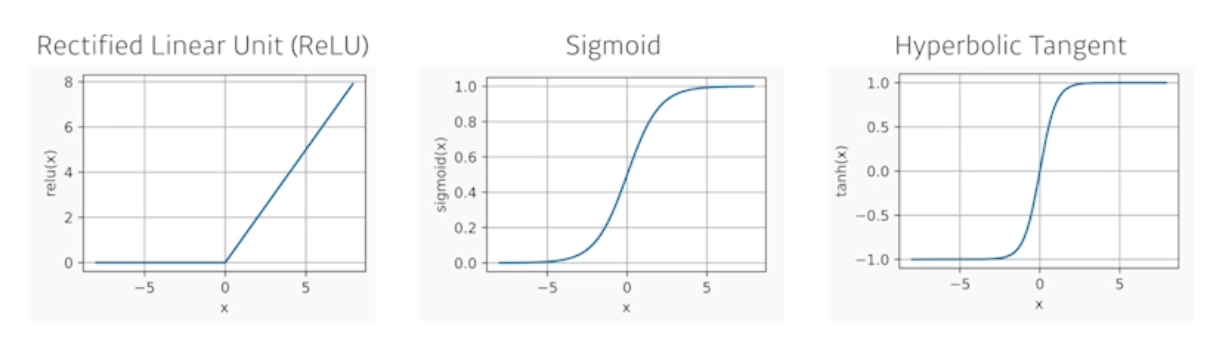

Multi-Layer Perceptron
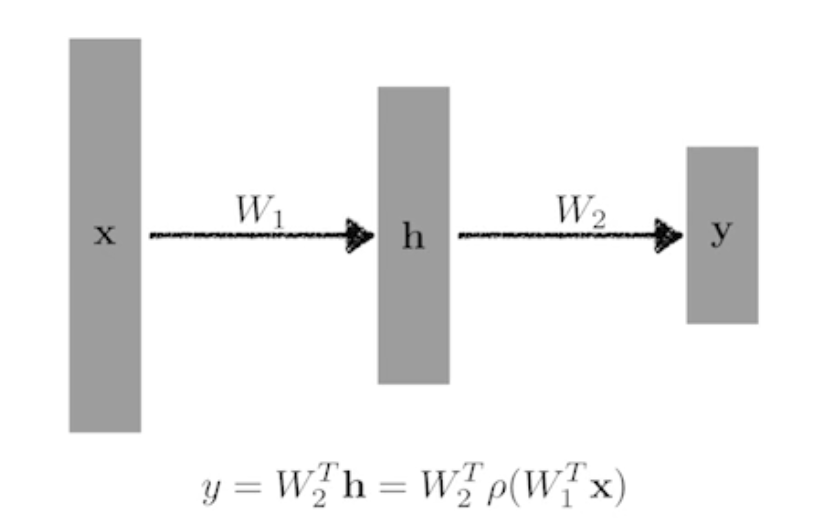

Loss function

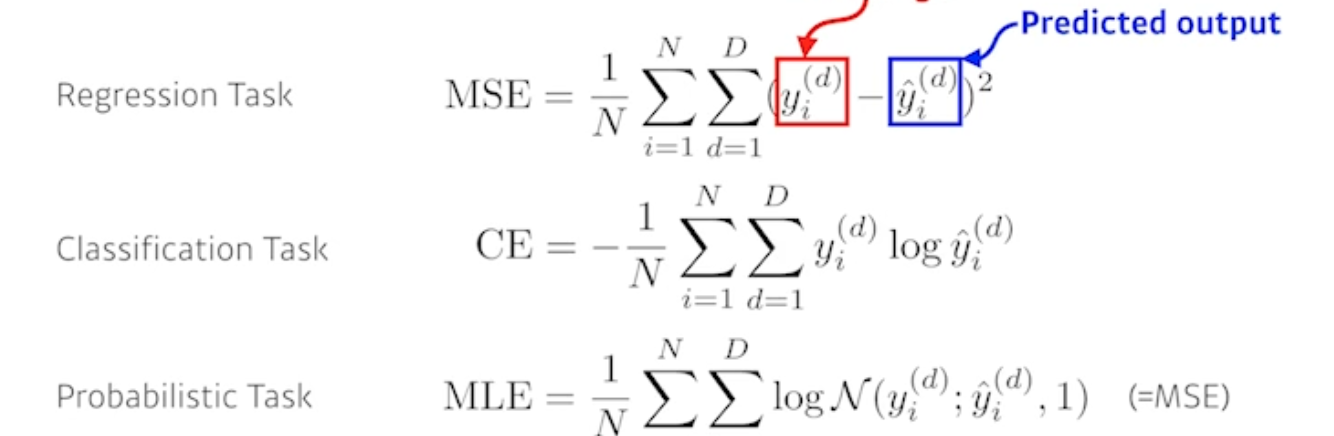

## 신경망을 수식으로

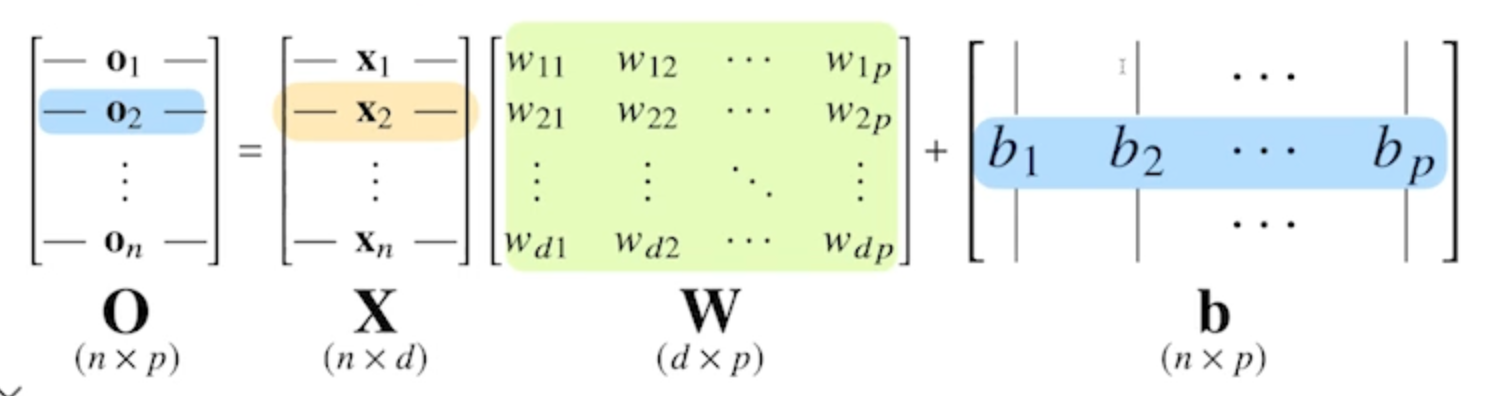

- 선형 모델의 수식으로, 데이터 값이 변할 경우 결과값도 바뀌게 된다
- 출력 백터의 차원 또한 d에서 p로 바뀌게 된다

이는 곧,

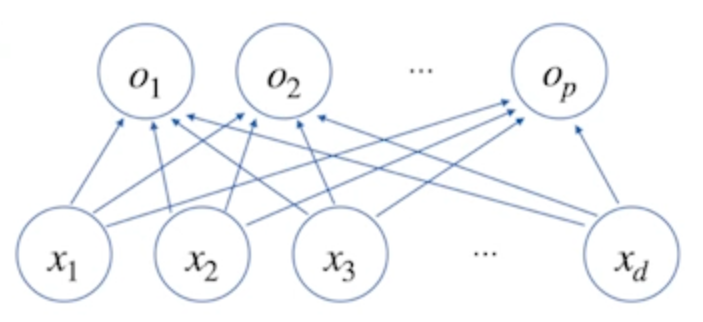

- d개의 변수 (차원)으로 p개의 선형 모델을 만들어 (layer 층 개수) p개의 잠재변수를 설명하는 모델이라고 볼 수 있다!

#### 소프트맥스 연산

- 소프트맥스 함수는 모델의 출력을 확률로 해석할 수 있게 변환해주는 연산
- 분류 문제를 풀 때 선형모델과 소프트맥스 함수를 결합하여 예측한다

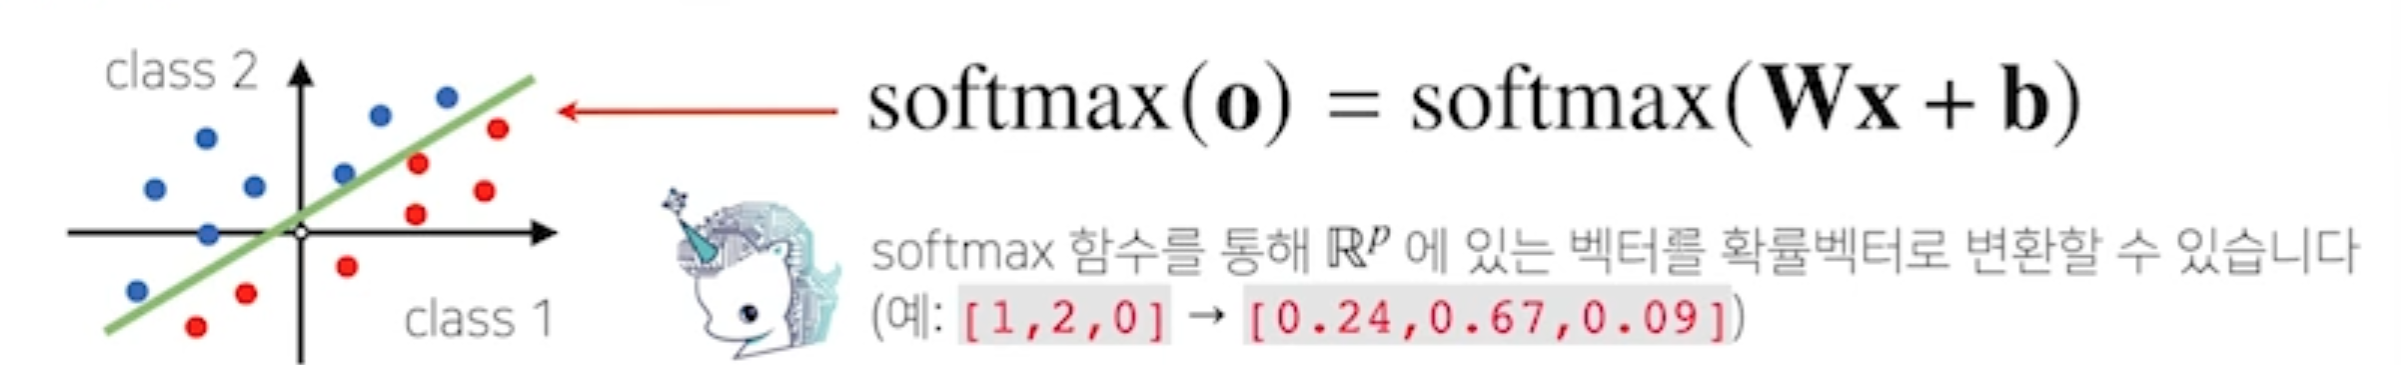

In [2]:
def softmax(vec):
  denumerator = np.exp(vec - np.max(vec, axis=-1, keepdims=True)) # 각각의 지수 함수 값
  numerator = np.sum(denumerator, axis=-1, keepdims=True) # 지수 함수 값의 합계
  val = denumerator / numerator
  return val

컴퓨터로 계산하는 경우, 오버플로우 문제가 발생할 수 있다
- 소프트맥스 함수는 지수 함수를 사용하는데 지수 함수가 쉽게 아주 큰 값을 내뱉을 수 있어 이런 큰 값끼리 나눗셈을 하는 경우에는 결과 수치가 불안정해지게 된다
- 결국, np.max로 최댓값을 뺘준 후, 지수 함수를 취한다

In [3]:
import numpy as np
vec = np.array([[1, 2, 0], [-1, 0, 1], [-10, 0, 10]])
softmax(vec) # 확률벡터로 변환된 값

array([[2.44728471e-01, 6.65240956e-01, 9.00305732e-02],
       [9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

그러나 분류 문제의 경우, 최대값을 가진 주소만 1로 출력하는 연산을 사용해서 softmax를 사용하지 않는다
- 대신, 원-핫 벡터를 사용하게 됨!

#### 활성함수
- 활성함수를 쓰지 않으면 딥러닝은 선형모형과 차이가 없다
- 시그모이드 함수나 tanh 함수는 많이 쓰이던 활성함수지만, 딥러닝에선 ReLU 함수를 많이 사용한다

#### 신경망
- 신경망은 선형모델과 활성함수를 합성한 함수이다
- 다층 퍼셉트론은 신경망이 여러층 합성된 함수
- 활성화 함수는 각 벡터에 개별적으로 적용되는 것이고, 각 벡터는 실수값으로 이루어져 있기 떄문에 결국에 각 요소값에 개별적으로 적용되게 된다

#### 왜 층을 여러개를 쌓나
- 이론적으로는 2층 신경망으로도 임의의 연속함수를 근사할 수 있다
- 그러나 층이 깊을수록 목적함수를 근사하는데 필요한 뉴런 (노드)의 숫자가 훨씬 빨리 줄어들어 좀 더 효율적으로 학습이 가능하다
  - 이는 즉, 적은 파라미터로도 더 복잡한 층을 이용해 더 빨리 목적함수에 근사할 수 있음을 의미
    - =/= 이는 최적화에 더 빨리 도달할 수 있다는 의미가 아니다.
    - 층이 깊어지면 깊어질수록 최적화는 어려워진다!
  - 또한, 층이 얇으면 필요한 뉴런의 숫자가 기하급수적으로 늘어나 넓은 (wide) 신경망이 되어야 한다

#### 역전파 알고리즘
- 딥러닝은 역전파 알고리즘을 이용하여 각 층에 사용된 파라미터를 학습한다
- 각 층 페러미터의 그레디언트 벡터는 윗층부터 역순으로 계산
- 역전파 알고리즘은 합성함수 미분법인 연쇄법칙 기반 자동미분을 사용

 #### 활성화 함수
 - 활성함수는 비선형 함수로서 딥러닝에서 매우 중요한 개념
 - 활성함수를 쓰지 않으면 딥러닝은 선형모형과 차이가 없음 -> 모델을 비선형 모형으로 변환
 - 시그모이드 함수나 tanh 함수는 전통적으로 많이 쓰이던 활성함수 -> 딥러닝에선 ReLU 함수를 많이 사용되고 있음

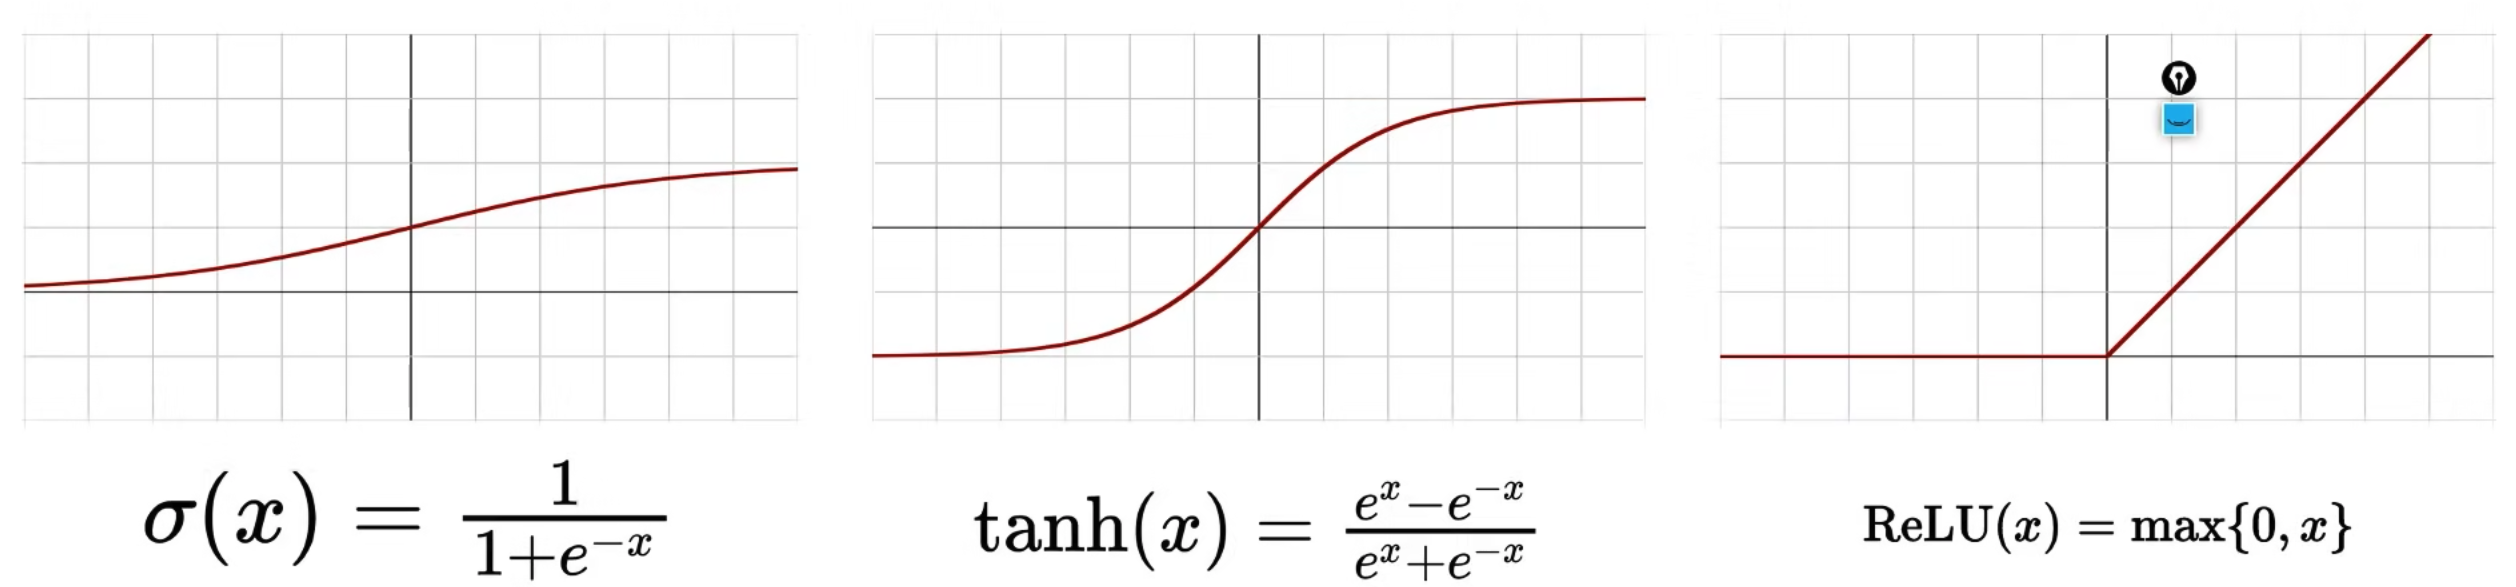

sigmoid function => 0~1

tanh function => -1~1

ReLU => 0~x

#### ReLU (Rectified Linear Unit)
- 양 극단값이 포화되지 않음 (양수 지역은 선형적))
  - 양 극단값이 계속 증가하지 않는다
- 계산이 매우 효율적 (최대값 연산 1개)
  - linear 이므로 미분할 경우, 그냥 1 -> 그래서 최대값 연산을 할께 별로 없다
- 수렴속도가 시그모이드류 함수 대비 6배 정도 빠르다
  - 시그모이드에 비해 미분이 간단하기 때문에
- 중심값이 0이 아님 (마이너한 문제)
- 입력값이 음수인 경우 항상 0을 출력 (마찬가지로 파라미터 업데이트가 안될 수 있다)
- 0에서는 미분이 불가능할 것 같지만, 프로그래밍으로 미분을 해결하게 한다

미분할 때, gradient 0을 기대할 수 없다
- 즉, 완전 최적화까지는 못가지만, 여러 층을 사용했더니 근사하게 가더라

Generalizations of ReLU
- ReLU는 특정 값에서 gradient를 받을 수 없다
- 어떤 경우에는 ReLU보다 잘 작동하는 generalization RELU를 만들자!!

Three generalizations of ReLU

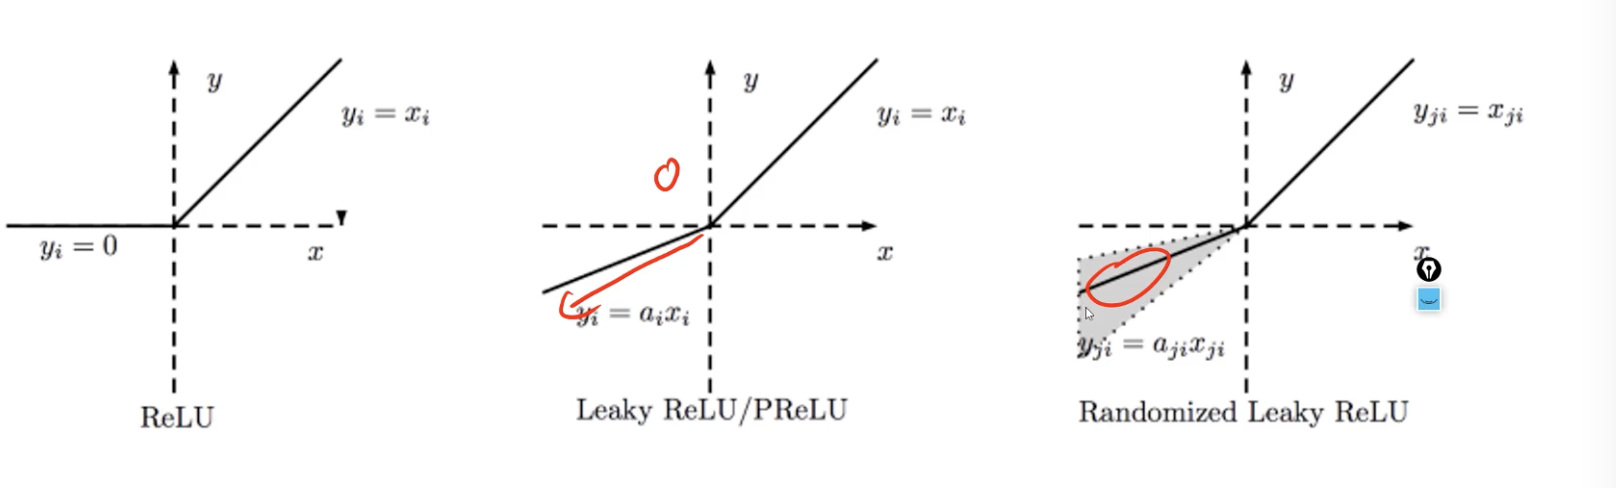

#### 시그모이드
- 결과값이 0, 1 사이로 제한됨
- 그레디언트가 죽는 현상 (gradient vanishing 문제) 발생
- 활성함수의 결과 값의 중심이 0이 아니다
- 계산이 복잡하다 (지수함수 계산)
- binary classificaion 문제에서 마지막 문제를 푸는 정도에만 사용된다

#### gradient vanishing
- 시그모이드와 같이 결과값이 포화되는 함수는 gradient vanishing 현상을 야기
- 이전 레이어로 전파되는 그라디언트가 0에 가까워지는 현상
- 레이어를 깊게 쌓으면 파라미터의 업데이트가 제대로 이루어지지 않는다
- 양 극단의 미분값이 0에 가깝기 때문에 발생하는 문제
  - 역전파 과정에서 출력층에서 멀어질수록 Gradient 값이 매우 작아지는 현상
  - 시그모이드 함수의 미분 값은 입력값이 0일 때 가장 크지만, x값이 크거나 작아짐에 따라 기울기는 거의 0에 수렴하게 된다 (시그모이드 함수 미분 그래프 참조) 따라서, 역전파 과정에서 시그모이드 함수의 미분값이 거듭 곱해지면 출력층과 멀어질수록 Gradient 값이 매우 작아지게 되는 것

#### 하이퍼볼릭-탄젠트
- 결과값이 -1, 1사이로 제한됨
- 나머지 특성은 시그모이드와 비슷함
- 시그모이드 함수를 이용하여 유도 가능
- 일반적으로 시그모이드보다 나은 성능
- 여전히 gradient vanishing 문제를 일으킬 수 있다
- 결과값 중심이 0이다

그외에도 수많은 활성화 함수들이 존재!

## Feed-forward Propagation

- 신경망은 선형 모델과 활성함수를 합성한 함수이다
- 다층 퍼셉트론은 신경망이 여러층 합성된 함수
- 층이 깊을 수록 목적함수를 근사하는데 필요한 뉴런 (노드)의 숫자가 많아짐 -> 가중치의 개수가 많아짐 -> gradient로 업데이트할 대상이 많아짐 -> time과 cost, computing resource가 더 필요하게 됨

## Softmax function

만약 마지막 레이어의 class가 여러 개라면?
- 3개 이상의 분류를 하는 방법 : multiclass classification

#### Concepts
- Multiclass classification
  - 두 개 이상의 클래스를 가진 분류 작업
  - 오렌지, 사과 또는 배
  - 중복 선택 불가 -> [1, 1, 0] 불가능
- Multilabel classification
  - 상호 배타적이지 않은 속성을 예측
  - 중복 선택 가능한 분류
  - 신문기사 분류 : 야구선수 - 연예인 결혼 -> 스포츠/연예

#### Sigmoid function for multiclass
- One vs All Approach
  - 클래스의 개수 m개만큼 classifier 함수 (hm) 생성
    - 만약 8개의 class라면 총 8개의 sigmoid function이 생기게 됨
  - 함수 hm(x)의 확률 값 중 가장 높은 값을 가진 m을 선택
  - 총 hm(x)의 확률 합이 1 이상이라는 문제점이 생긴다

#### Softmax function for multiclass
- 모든 class의 확률을 1로 Generalize 한다

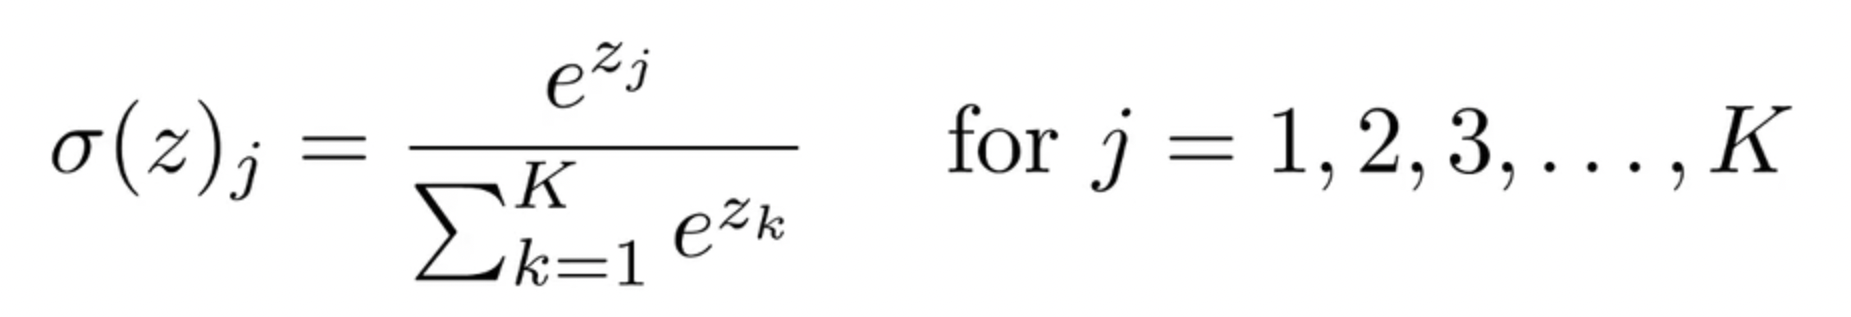

j = class의 개수
- 각각의 확률값을 모두 합산 한 것의 비율을 구함
- 결국 모두 sum했을 때 1이 나오도록!

#### Multiclass for LogisticRegression Class

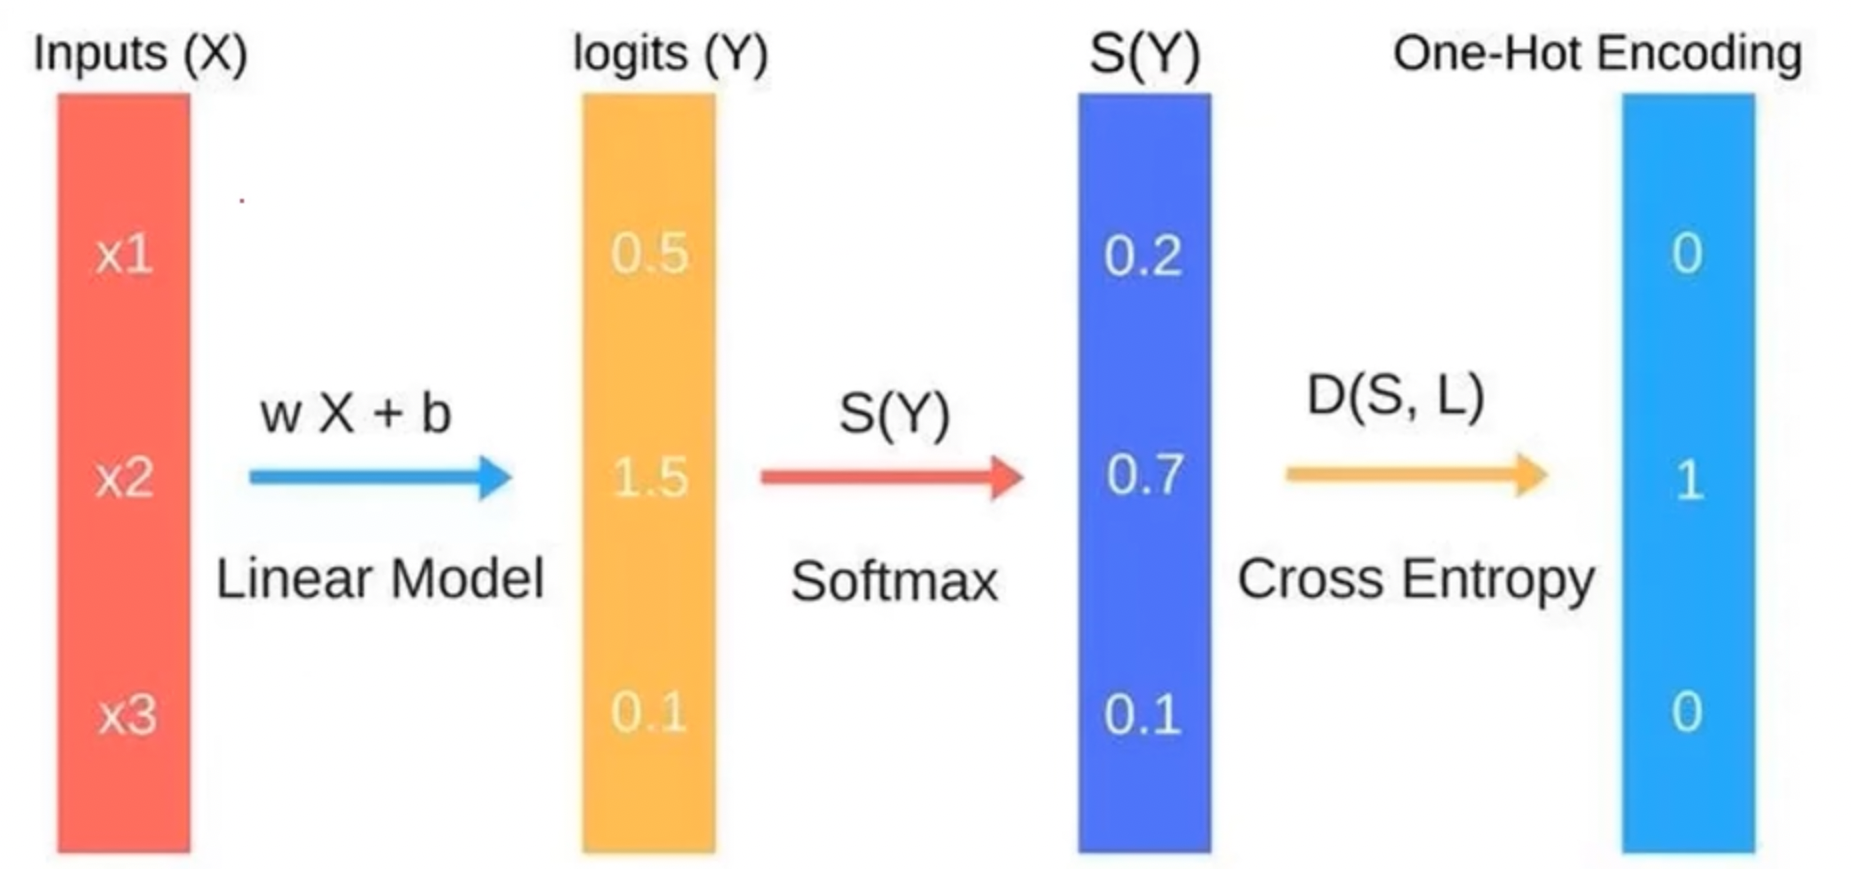

- linear model을 거친 z (logit)값을 softmax를 거칠 경우, 총합이 1로 나오는 것을 볼 수 있음
- 실제 정답 (one-hot encoding)과 S(Y) 중 가장 높은 값 (0.7)을 비교
  - 해당 과정에서 Cross Entropy function을 사용해서 loss 값을 minimize하게끔하고 이를 cross entropy loss라고 한다

#### Softmax function

- class가 두개인 경우,
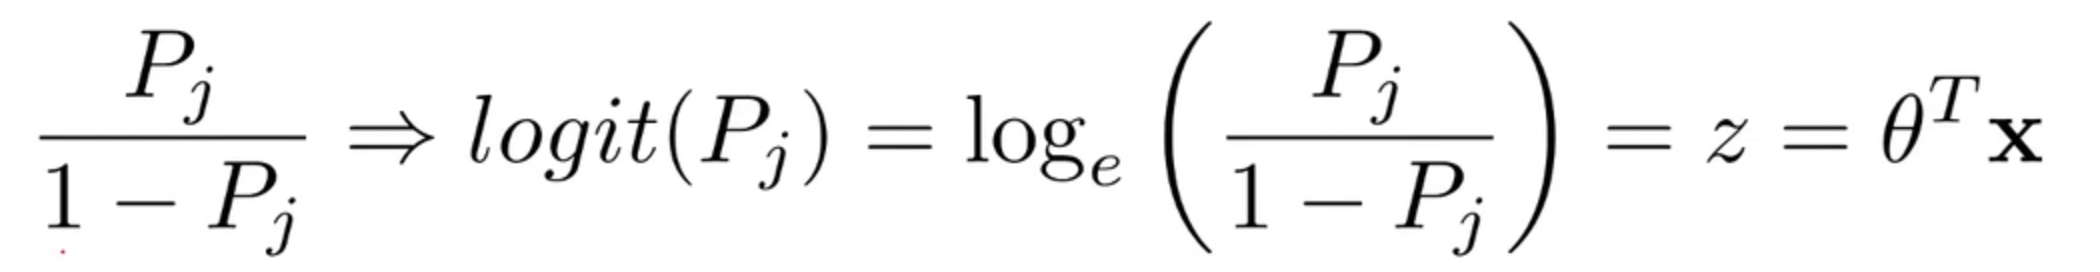

  - BCE loss! (Binary class Entropy)

- class가 k개인 경우,
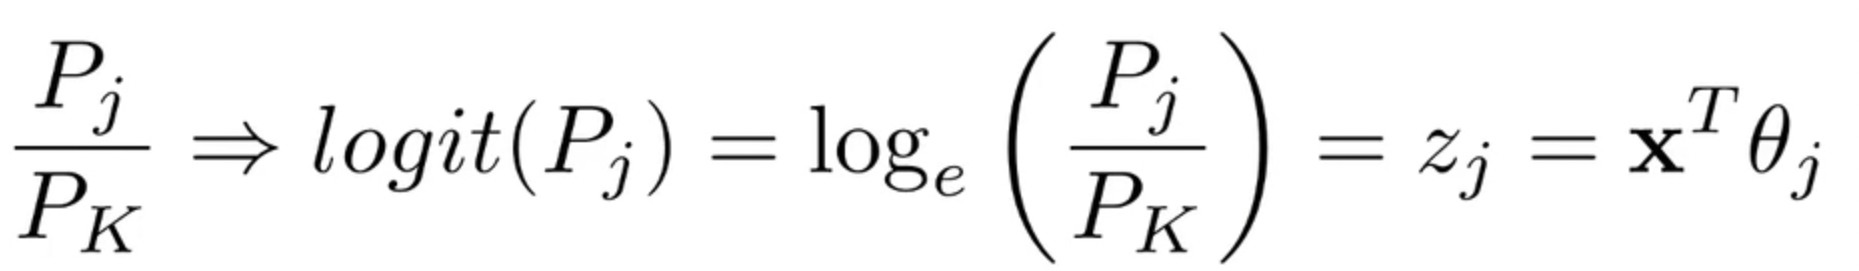

두 경우의 차이는, weight값이 벡터로 이루어져있는지 (binary), 메트릭스 형태인지 (multi-class)의 차이이다!
  - multi-class의 경우, 마지막 결과값이 여러개가 나와야하기 떄문에 각 class에 가중치가 존재해야하므로 NxN의 형태인 메트릭스로 형성된다

#### Softmax Function

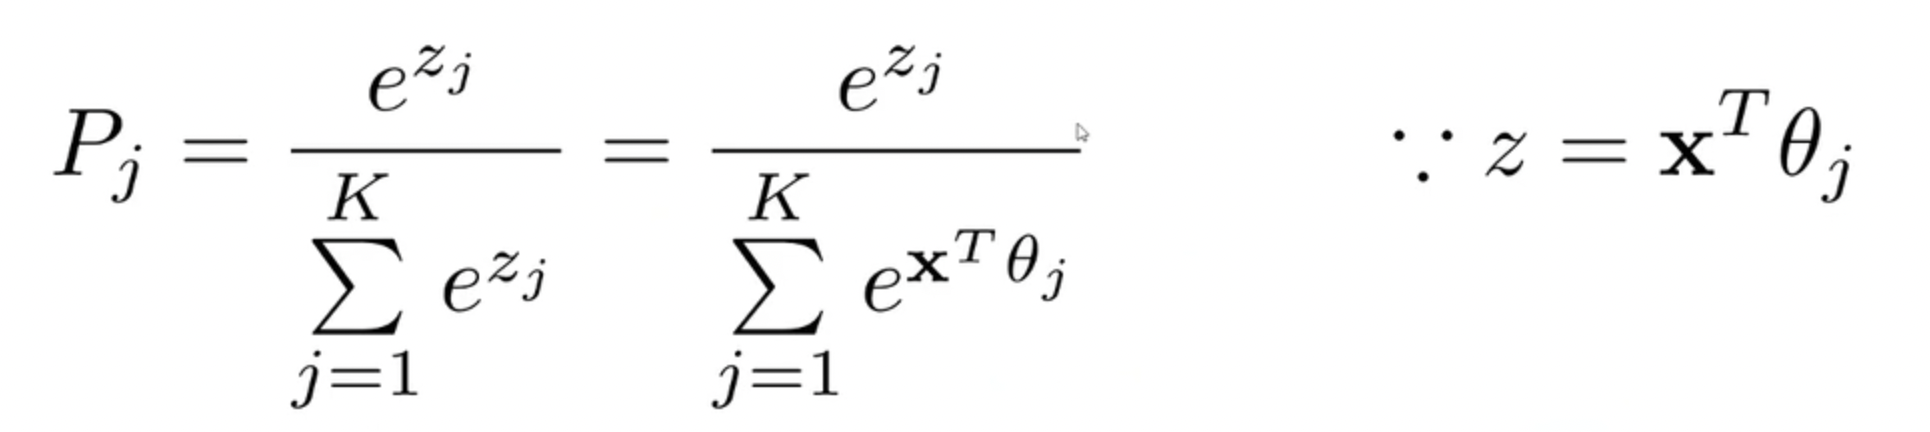

#### Softmax Function의 학습
- 확률을 최대화할 theta를 찾아야 함
  - theta를 미분해줘야 한다!
- 클래스마다 theta가 존재함

#### Minimize Cost Function
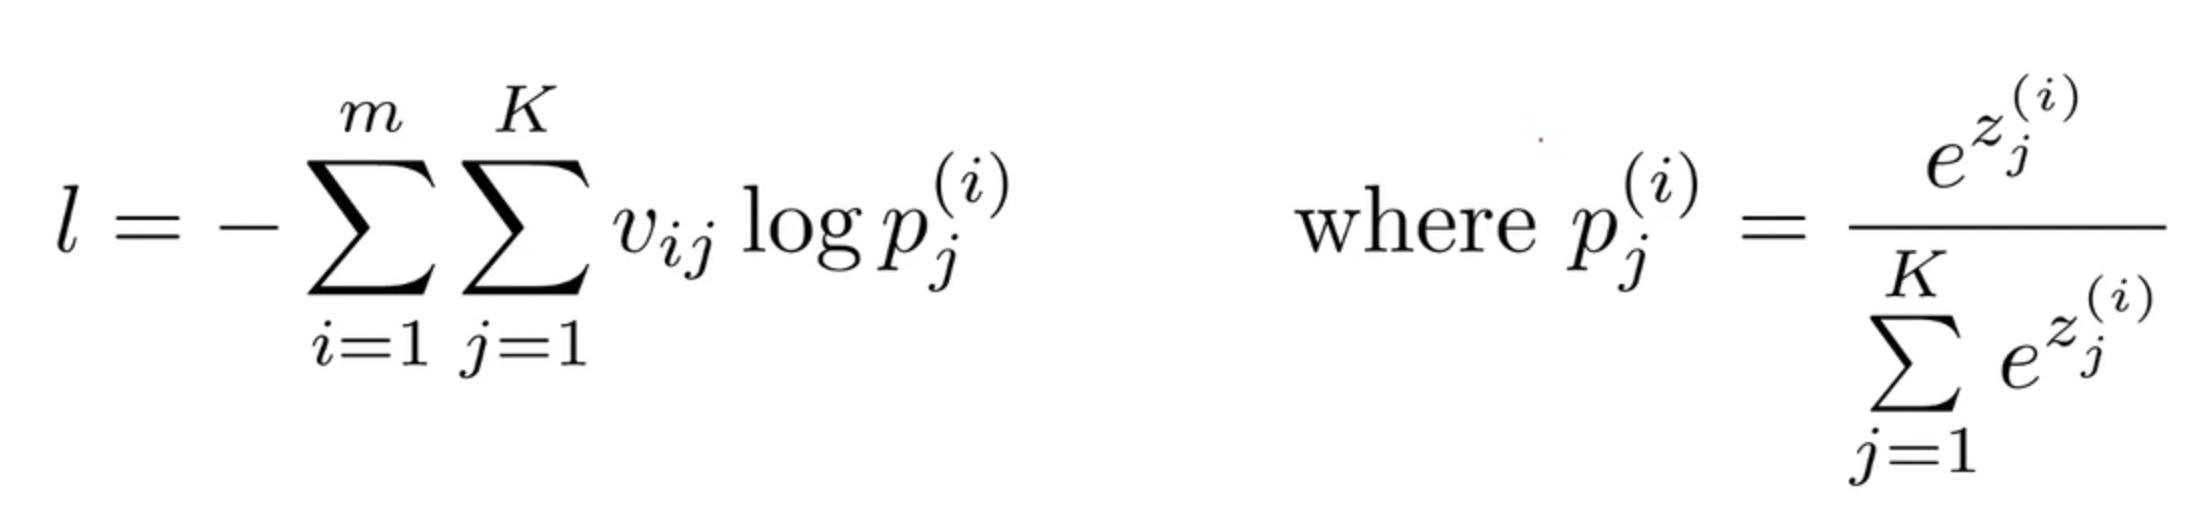

#### Cross-Entropy Loss function

- Loss Function = Cross-Entropy Function
- Entropy는 목적 달성을 위한 경우의 수를 정량적으로 표현하는 수치
  - 예측값에 대한 불확실성 척도, 복잡성을 표현하는 것
    - 가방 안에 색상 공을 꺼낸다고 했을 때, 50:50 으로 들어있을 때, 가장 entropy (불확실성) 이 크다. 반반으로 들어있다면, 어떤 공이 더 자주 관찰될지 예측할 수 없기 때문에 entropy 가 크다고 이해할 수 있다.
  - 작을수록 경우의 수가 적다 = 예측한 값이랑 원래 값이 많이 차이가 날수록 entropy가 커진다

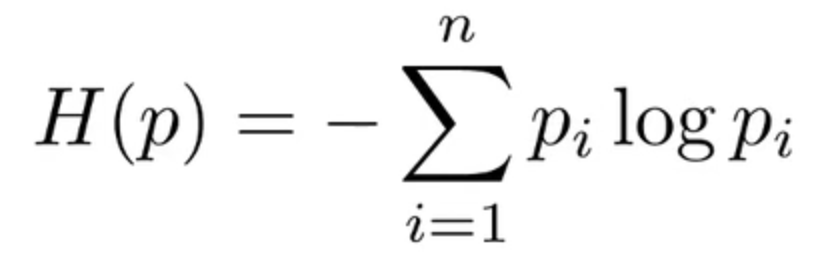